In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_excel(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Market and risk analytics\Sales_Data.xlsx", sheet_name = "Data")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [5]:
# 1.Agenda & Executive Summary of the data -> Contents of the ppt -> Problem statement -> About Data (Info, Shape, Summary Stats, your assumptions about data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
df.shape

(2747, 20)

In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042548,4.230544,1838.953901,NaN,819.280576,40.114802


In [9]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [10]:
# 2.Exploratory Analysis and Inferences -> Univariate, Bivariate, and multivariate analysis using data visualization (Weekly, Monthly, Quarterly, Yearly Trends in Sales and Sales Across different Categories of different features in the given data) -> Summarise the inferences

In [11]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [12]:
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quarter'] = df['ORDERDATE'].dt.quarter
df['Week'] = df['ORDERDATE'].dt.isocalendar().week

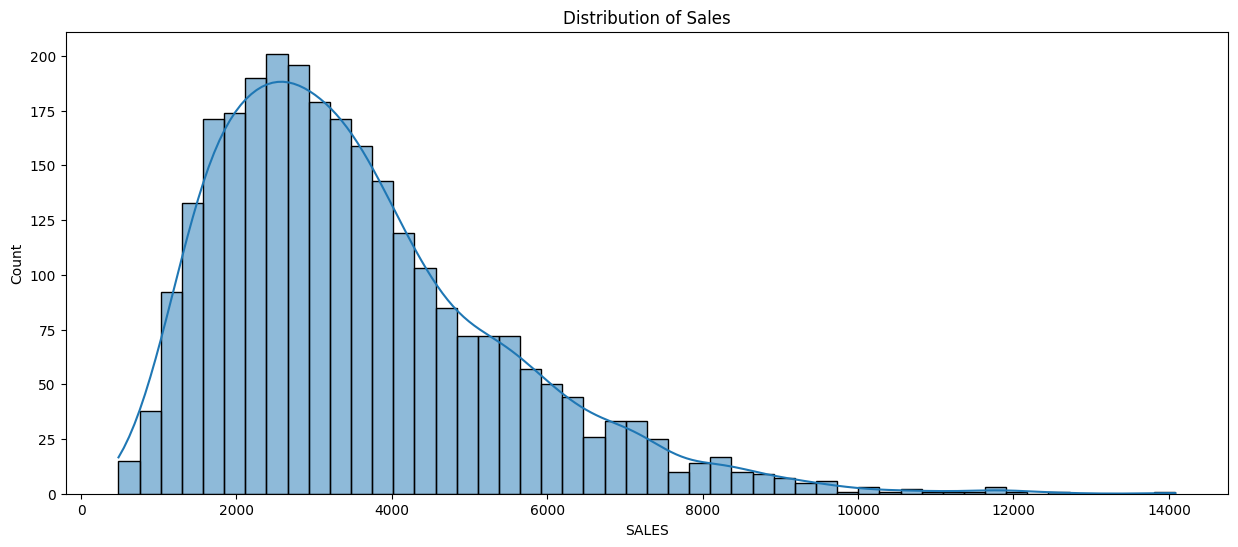

In [13]:
# Univariate Analysis
plt.figure(figsize=(15, 6))
sns.histplot(df['SALES'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.show()

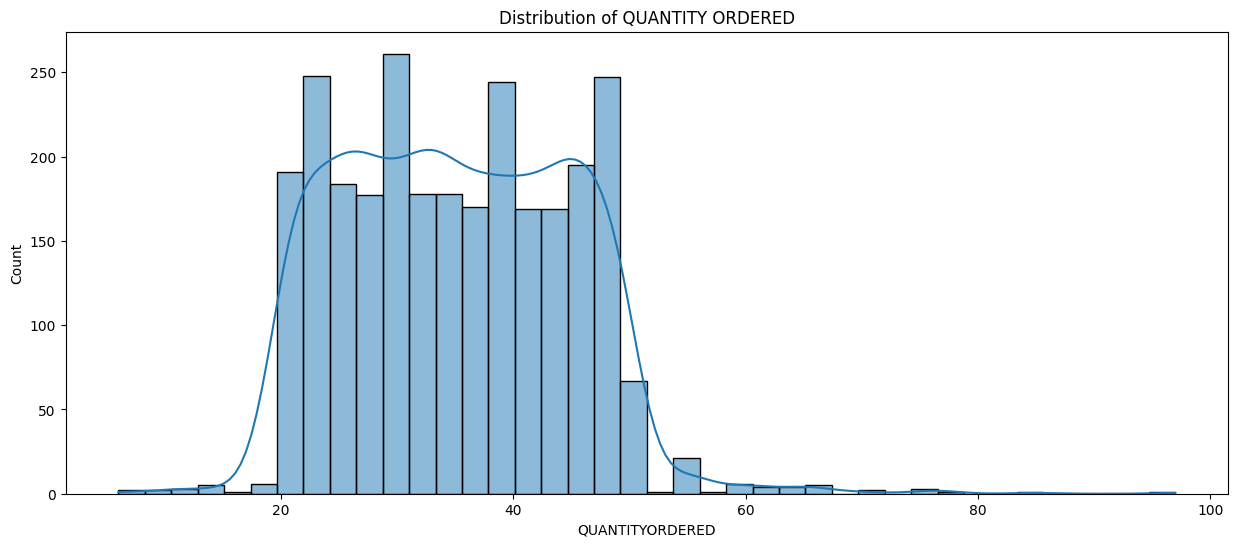

In [14]:
# Univariate Analysis
plt.figure(figsize=(15, 6))
sns.histplot(df['QUANTITYORDERED'], bins=40, kde=True)
plt.title('Distribution of QUANTITY ORDERED')
plt.show()

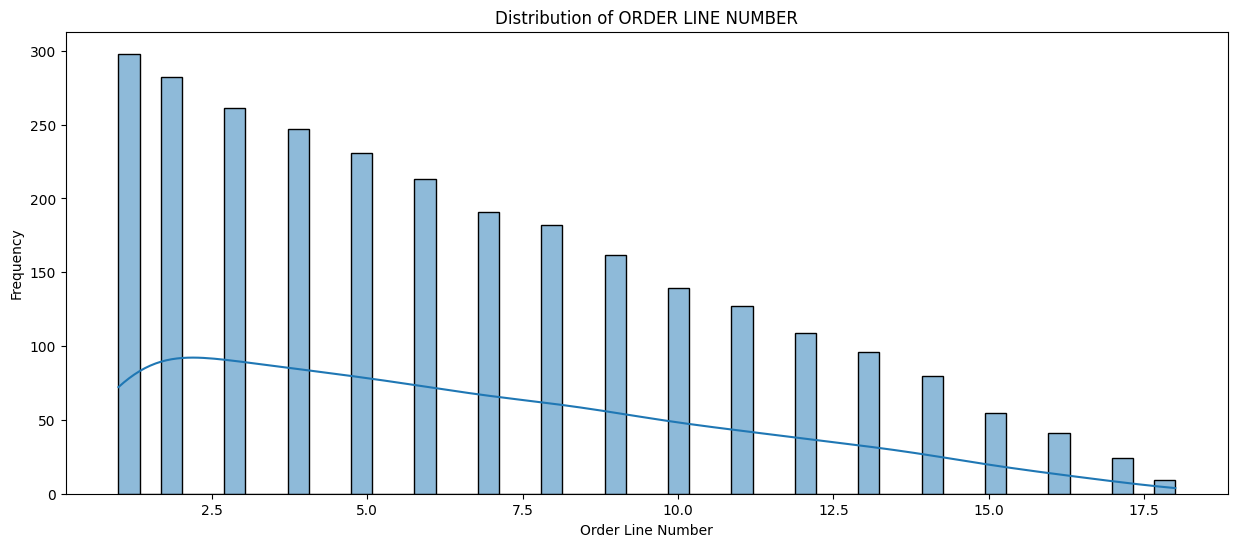

In [15]:
plt.figure(figsize=(15, 6))
sns.histplot(df['ORDERLINENUMBER'], bins=50, kde=True)
plt.title('Distribution of ORDER LINE NUMBER')
plt.xlabel('Order Line Number') 
plt.ylabel('Frequency')
plt.show()

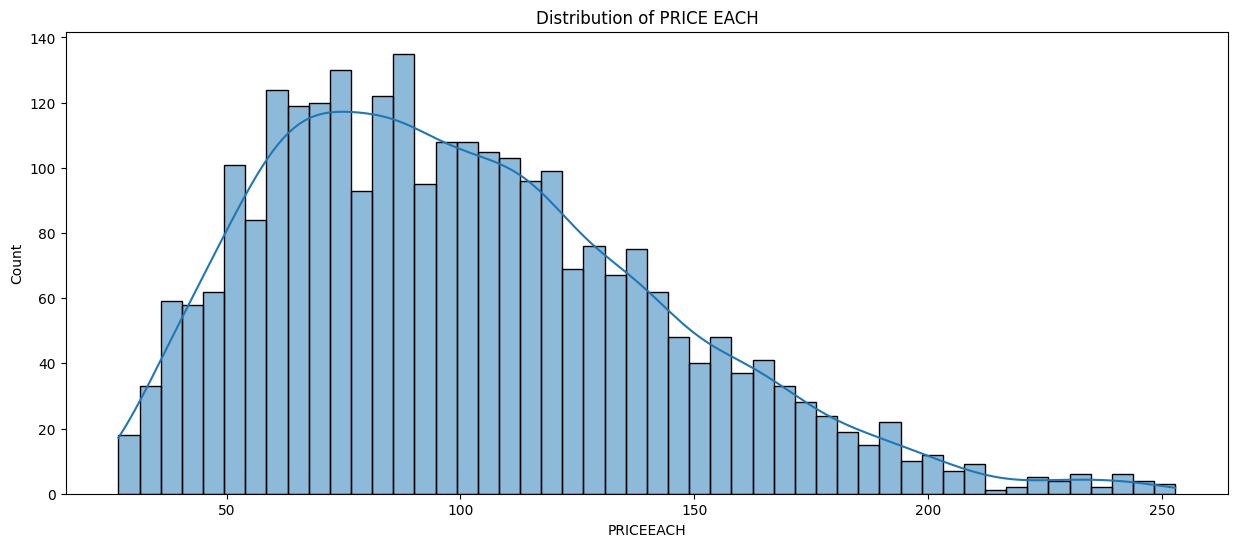

In [16]:
plt.figure(figsize=(15, 6))
sns.histplot(df['PRICEEACH'], bins=50, kde=True)
plt.title('Distribution of PRICE EACH')
plt.show()

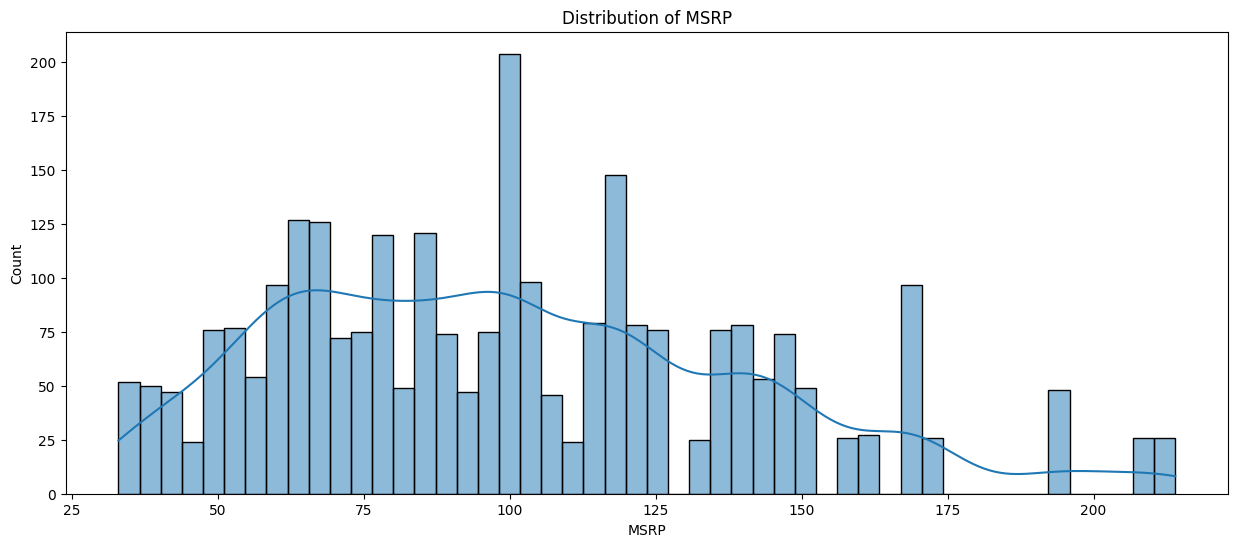

In [17]:
plt.figure(figsize=(15, 6))
sns.histplot(df['MSRP'], bins=50, kde=True)
plt.title('Distribution of MSRP')
plt.show()

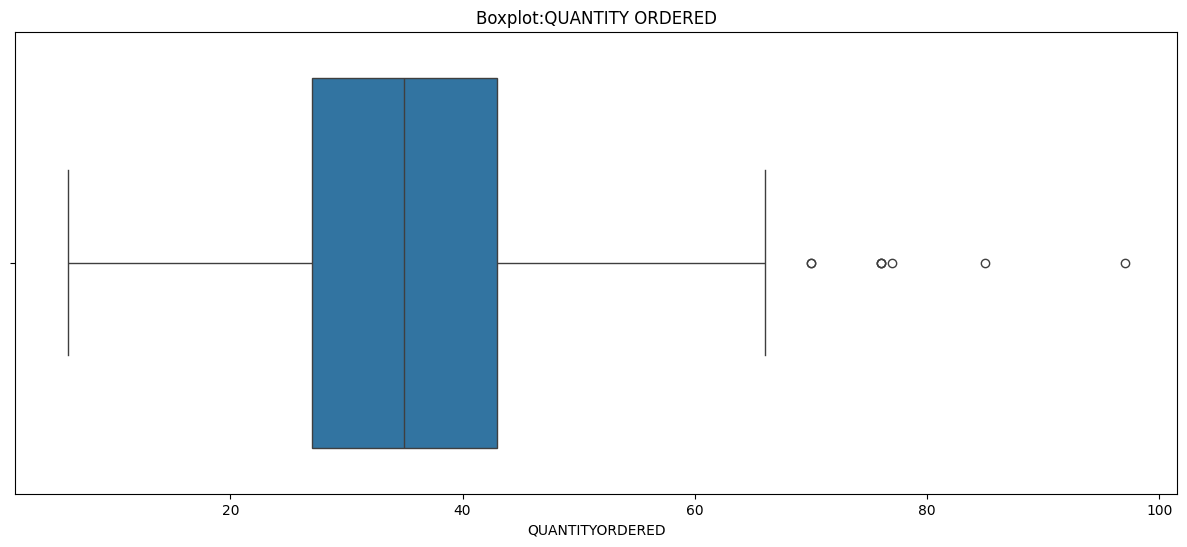

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='QUANTITYORDERED',data=df)
plt.title('Boxplot:QUANTITY ORDERED')
plt.show()

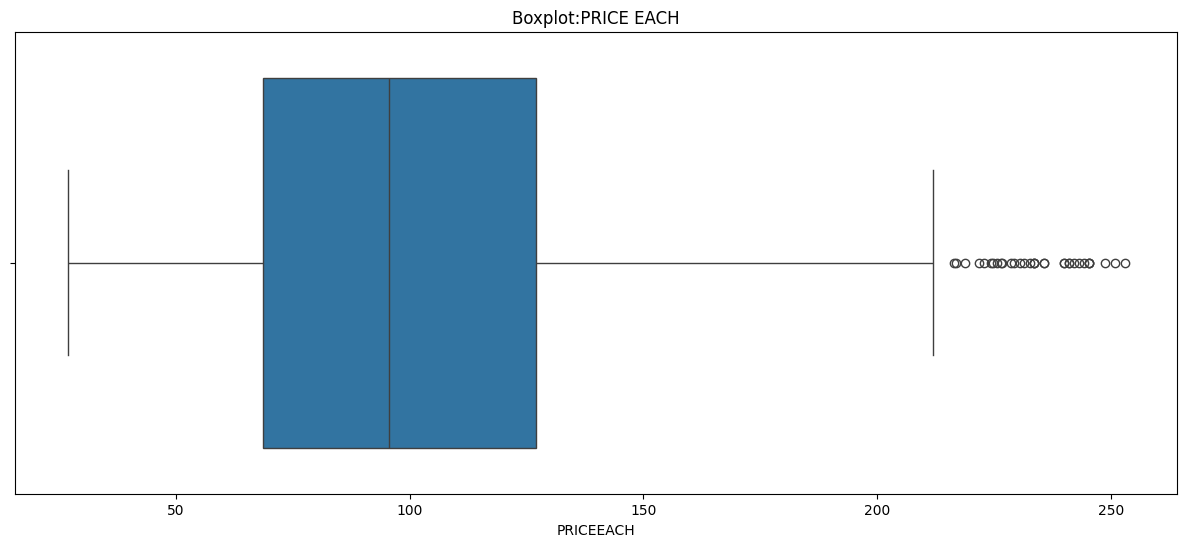

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='PRICEEACH',data=df)
plt.title('Boxplot:PRICE EACH')
plt.show()

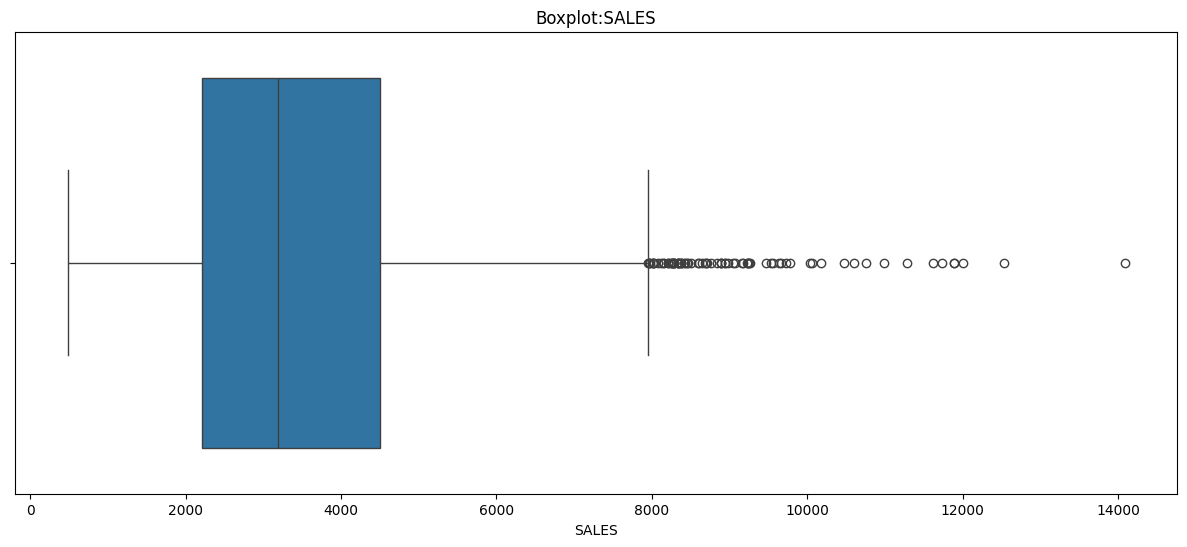

In [20]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='SALES',data=df)
plt.title('Boxplot:SALES' )
plt.show()

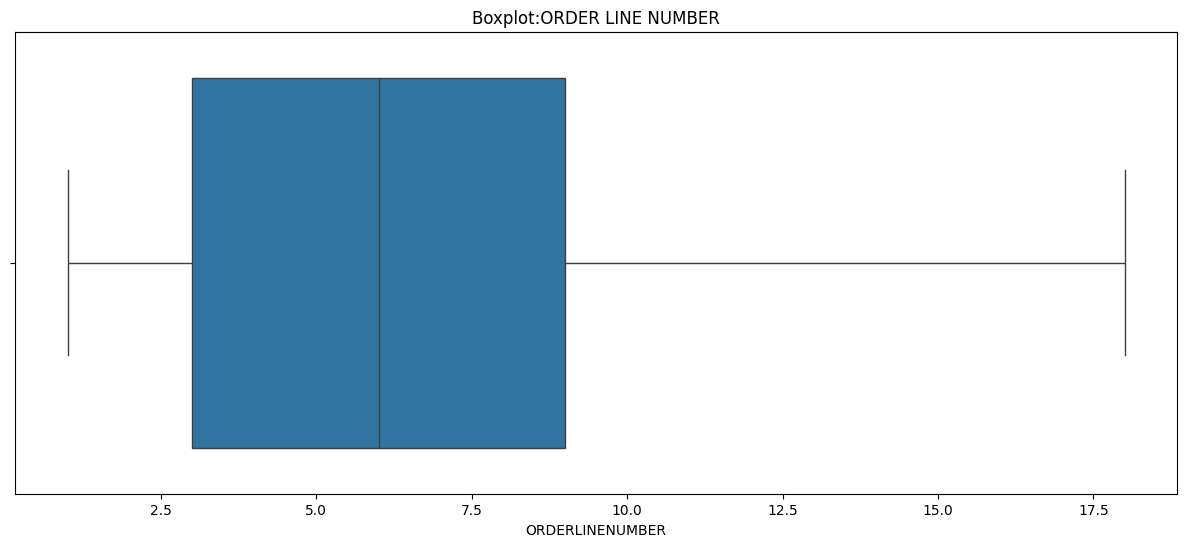

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='ORDERLINENUMBER',data=df)
plt.title('Boxplot:ORDER LINE NUMBER' )
plt.show()

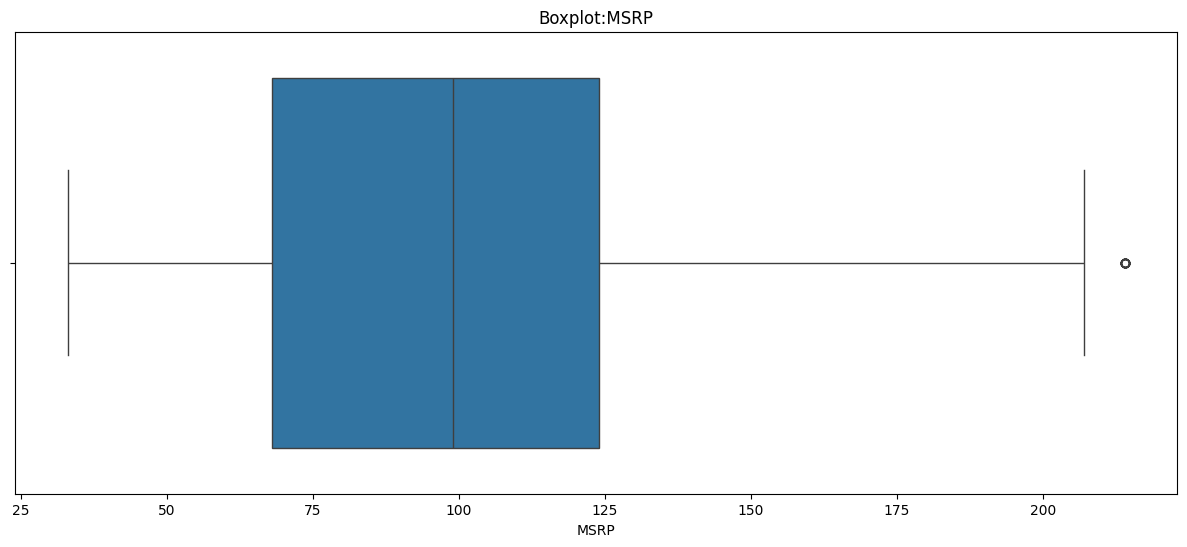

In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='MSRP',data=df)
plt.title('Boxplot:MSRP' )
plt.show()

In [23]:
# Bivariate Analysis

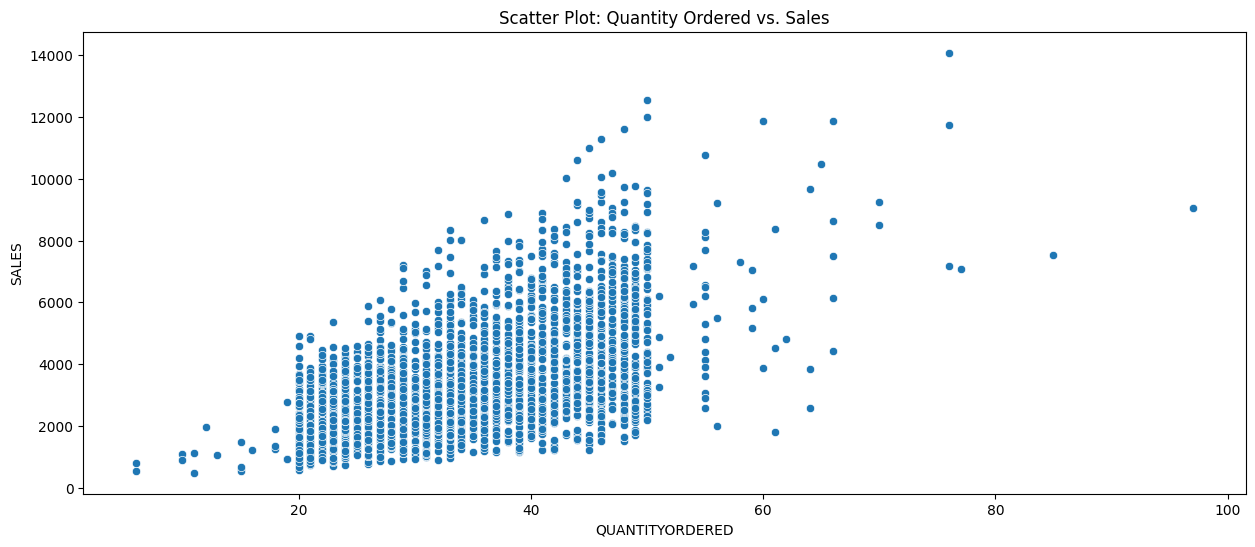

In [38]:

plt.figure(figsize=(15, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df)
plt.title('Scatter Plot: Quantity Ordered vs. Sales')
plt.show()

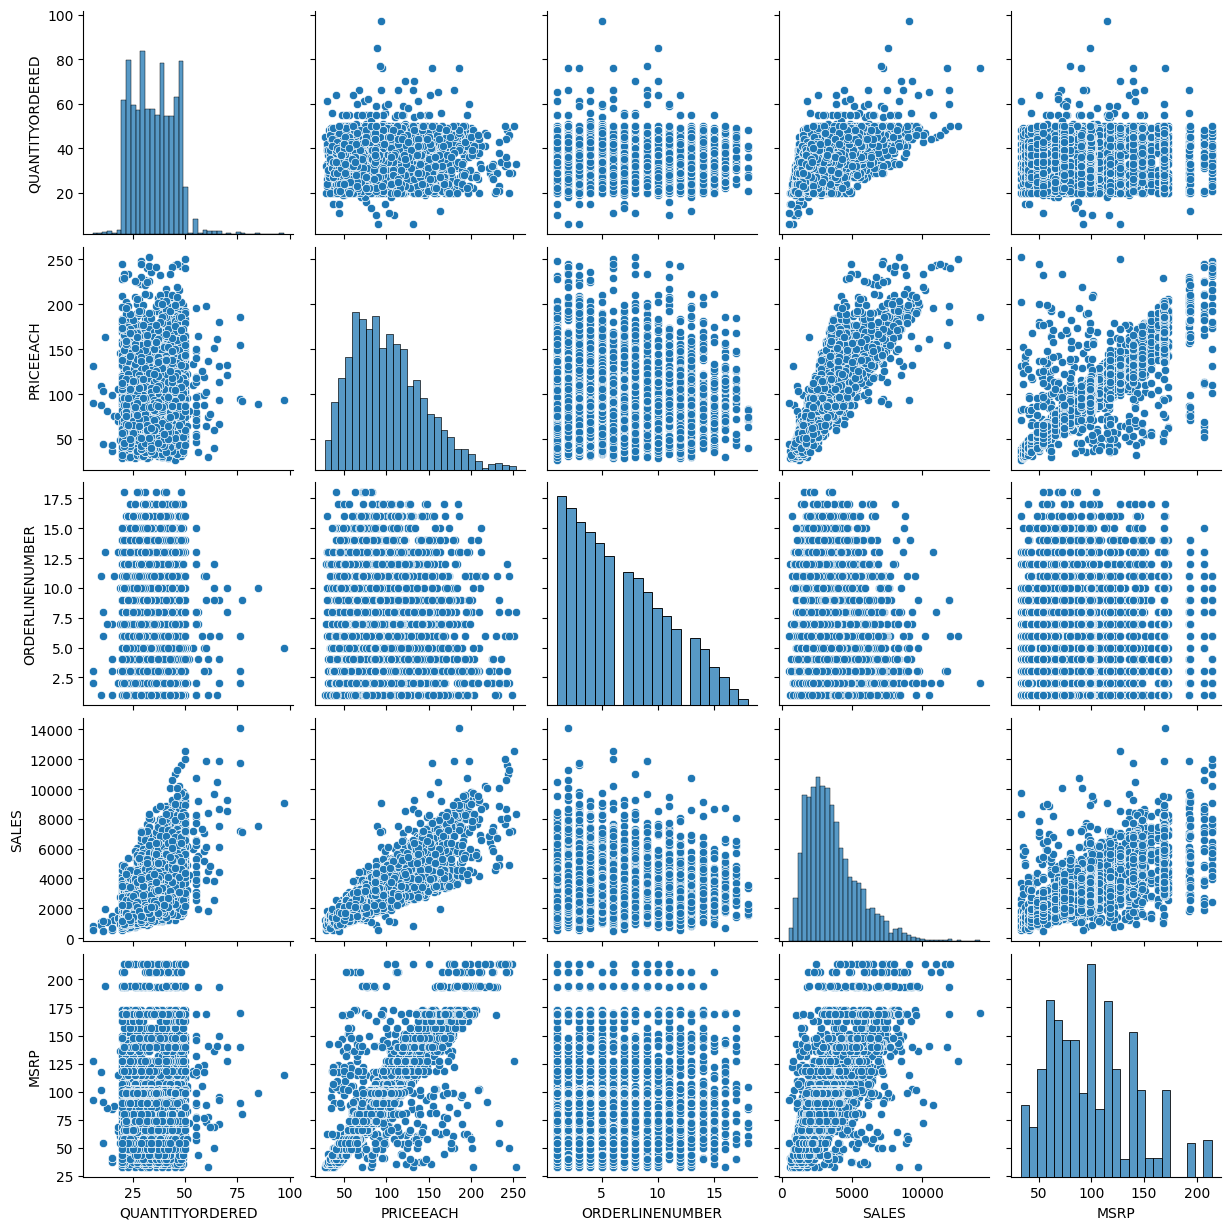

In [25]:
# Load the data sheet
df = pd.read_excel(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Market and risk analytics\Sales_Data.xlsx", sheet_name="Data")

# Select specific columns for pair plot
selected_columns = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP']

# Create a pair plot
sns.pairplot(df[selected_columns])
plt.show()

In [26]:
# Multivariate Analysis

In [27]:
subset_df = df[selected_columns]
correlation_matrix = subset_df.corr()

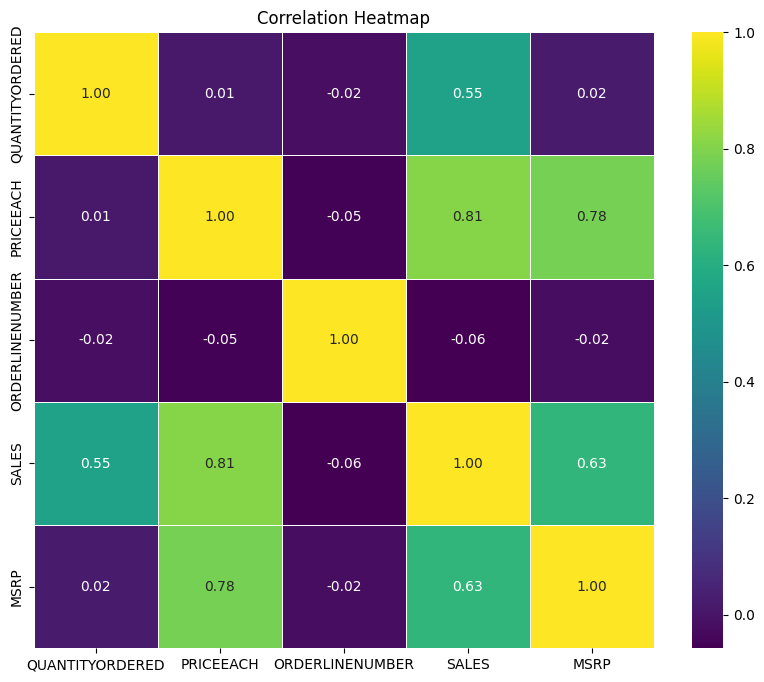

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

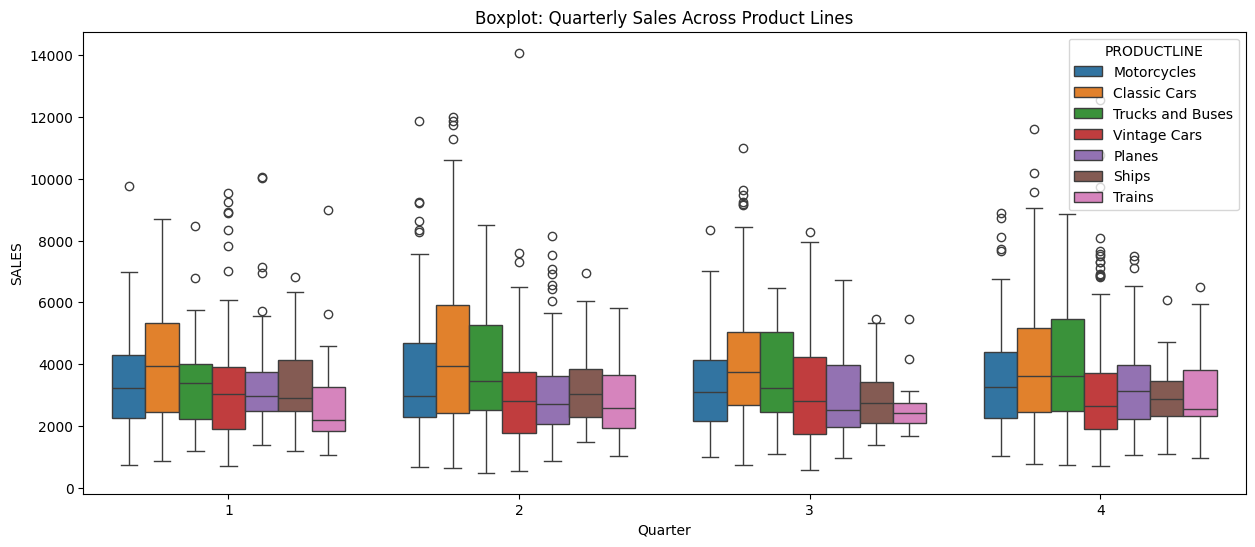

In [29]:
# Multivariate Analysis

# Ensure 'ORDERDATE' column is in datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Extract additional date-related features
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quarter'] = df['ORDERDATE'].dt.quarter

plt.figure(figsize=(15, 6))
sns.boxplot(x='Quarter', y='SALES', hue='PRODUCTLINE', data=df)
plt.title('Boxplot: Quarterly Sales Across Product Lines')
plt.show()

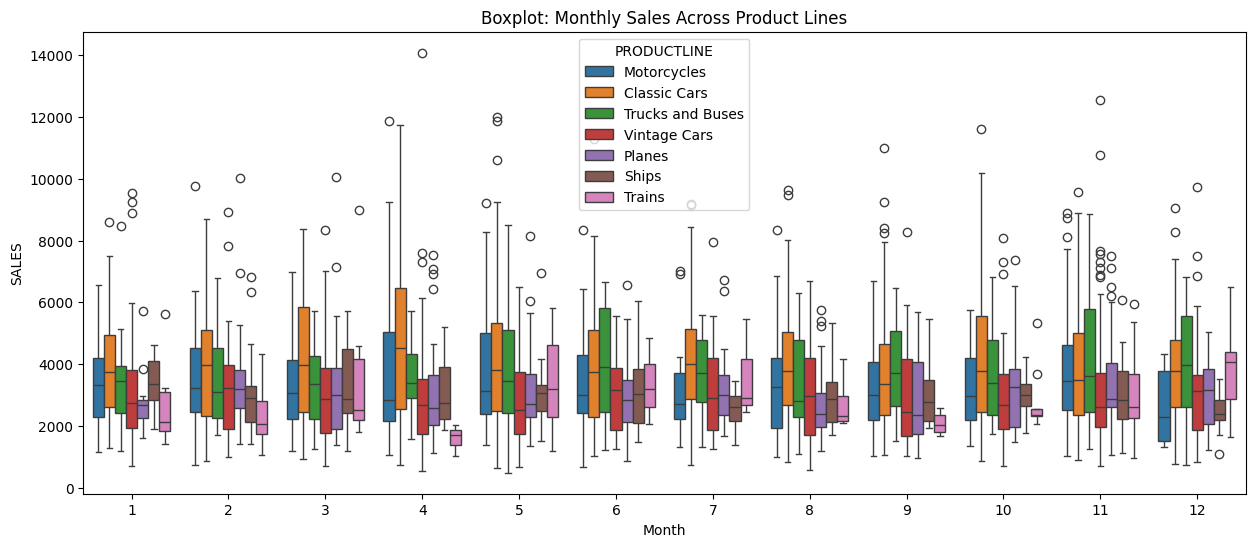

In [30]:
# Monthly Sales Across Product Lines
plt.figure(figsize=(15, 6))
sns.boxplot(x='Month', y='SALES', hue='PRODUCTLINE', data=df)
plt.title('Boxplot: Monthly Sales Across Product Lines')
plt.show()

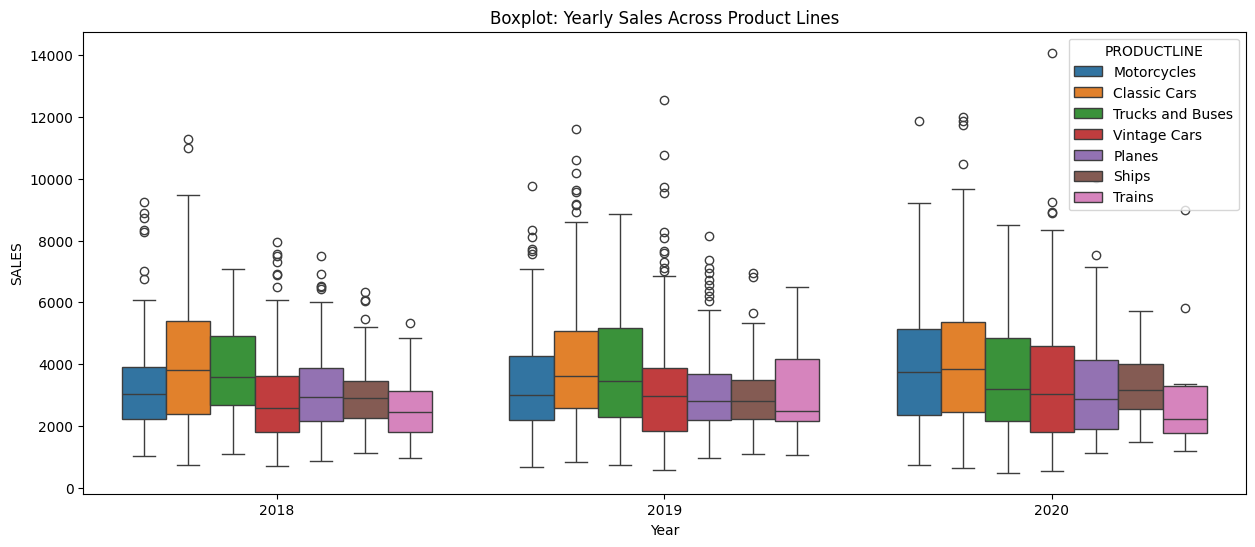

In [31]:
# Yearly Sales Across Product Lines
plt.figure(figsize=(15, 6))
sns.boxplot(x='Year', y='SALES', hue='PRODUCTLINE', data=df)
plt.title('Boxplot: Yearly Sales Across Product Lines')
plt.show()

In [32]:
# Ensure 'ORDERDATE' column is in datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Extract additional date-related features
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quarter'] = df['ORDERDATE'].dt.quarter

# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from the 'SALES' column
df_no_outliers = remove_outliers(df, 'SALES')

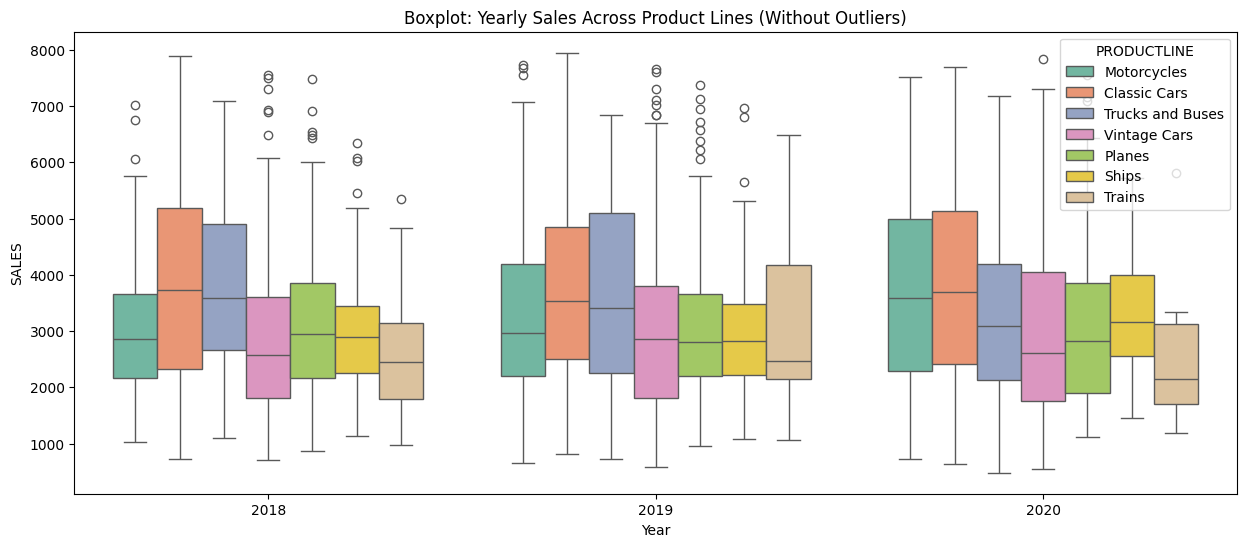

In [34]:
# Yearly Sales Across Product Lines without outliers
plt.figure(figsize=(15, 6))
sns.boxplot(x='Year', y='SALES', hue='PRODUCTLINE', data=df_no_outliers,palette='Set2')
plt.title('Boxplot: Yearly Sales Across Product Lines (Without Outliers)')
plt.show()